# Load Libraries

In [1]:
# import the  libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import datetime
import sklearn

import warnings
warnings.filterwarnings("ignore")
print("Libraries Import Successfully")

Libraries Import Successfully


# Load Data

In [2]:
# read the dataset
data = pd.read_csv('C:/Users/Alfarid/Desktop/dataset//ALFARID_EDA_PROJECT/nyc_taxi_trip_duration.csv')
df = data.sample(n = 10000, random_state=1)

In [3]:
# checking first 2 rows (datapoints)
df.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
455488,id2898909,1,2016-03-03 10:30:21,2016-03-03 10:43:49,1,-73.991409,40.750320,-73.978813,40.762032,N,808
112922,id3276089,2,2016-03-23 18:39:57,2016-03-23 19:01:06,1,-73.981850,40.773289,-73.978973,40.757240,N,1269


In [4]:
# checking last 2 rows (datapoints)
df.tail(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
222986,id0368269,2,2016-06-23 19:00:44,2016-06-23 19:08:55,1,-73.969582,40.763351,-73.966789,40.757462,N,491
320851,id2841021,2,2016-02-05 06:52:43,2016-02-05 06:54:47,2,-73.999619,40.743626,-73.992867,40.748825,N,124


# Extracting DateTime

In [5]:
#EXTRACTING month,day,hour,year data from datetimefor both pickup ad dropoff

for i in['pickup','dropoff']:
    df['{}_datetime'.format(i)] = pd.to_datetime(df['{}_datetime'.format(i)])
    df['{}_month'.format(i)] = df['{}_datetime'.format(i)].apply(lambda x:x.month)
    df['{}_day_name'.format(i)] = df['{}_datetime'.format(i)].apply(lambda x:x.day_name())
    df['{}_hour'.format(i)]= df['{}_datetime'.format(i)].apply(lambda x:x.hour)
    df['{}_year'.format(i)] = df['{}_datetime'.format(i)].apply(lambda x:x.year)

In [6]:
#visualising the new data

df.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_day_name,pickup_hour,pickup_year,dropoff_month,dropoff_day_name,dropoff_hour,dropoff_year
455488,id2898909,1,2016-03-03 10:30:21,2016-03-03 10:43:49,1,-73.991409,40.750320,-73.978813,40.762032,N,808,3,Thursday,10,2016,3,Thursday,10,2016
112922,id3276089,2,2016-03-23 18:39:57,2016-03-23 19:01:06,1,-73.981850,40.773289,-73.978973,40.757240,N,1269,3,Wednesday,18,2016,3,Wednesday,19,2016


# File structure and content

In [7]:
#visualising data's metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 455488 to 320851
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  10000 non-null  object        
 1   vendor_id           10000 non-null  int64         
 2   pickup_datetime     10000 non-null  datetime64[ns]
 3   dropoff_datetime    10000 non-null  datetime64[ns]
 4   passenger_count     10000 non-null  int64         
 5   pickup_longitude    10000 non-null  float64       
 6   pickup_latitude     10000 non-null  float64       
 7   dropoff_longitude   10000 non-null  float64       
 8   dropoff_latitude    10000 non-null  float64       
 9   store_and_fwd_flag  10000 non-null  object        
 10  trip_duration       10000 non-null  int64         
 11  pickup_month        10000 non-null  int64         
 12  pickup_day_name     10000 non-null  object        
 13  pickup_hour         10000 non-null  int6

In [8]:
#check datatypes
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup_month                   int64
pickup_day_name               object
pickup_hour                    int64
pickup_year                    int64
dropoff_month                  int64
dropoff_day_name              object
dropoff_hour                   int64
dropoff_year                   int64
dtype: object

In [9]:
#give the type of data structures used to store the data elements
type(df)

pandas.core.frame.DataFrame

In [10]:
# to check the dimension of the data set, we can use the shape 
df.shape

(10000, 19)

In [11]:
#printing all the columns in the table
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_month', 'pickup_day_name', 'pickup_hour',
       'pickup_year', 'dropoff_month', 'dropoff_day_name', 'dropoff_hour',
       'dropoff_year'],
      dtype='object')

In [12]:
# check statistics of the features
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_hour,pickup_year,dropoff_month,dropoff_hour,dropoff_year
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.0
mean,1.535500,1.658400,-73.973127,40.751382,-73.973076,40.752170,904.907500,3.501900,13.618400,2016.0,3.502000,13.681500,2016.0
std,0.498763,1.317985,0.038408,0.028046,0.038463,0.032840,2612.311343,1.687744,6.458092,0.0,1.687804,6.513148,0.0
min,1.000000,1.000000,-74.177414,40.613640,-74.775429,40.364536,2.000000,1.000000,0.000000,2016.0,1.000000,0.000000,2016.0
25%,1.000000,1.000000,-73.991646,40.738005,-73.991119,40.736545,388.000000,2.000000,9.000000,2016.0,2.000000,9.000000,2016.0
50%,2.000000,1.000000,-73.981728,40.754747,-73.979675,40.754837,650.000000,4.000000,14.000000,2016.0,4.000000,14.000000,2016.0
75%,2.000000,2.000000,-73.967529,40.768501,-73.962475,40.770267,1071.000000,5.000000,19.000000,2016.0,5.000000,19.000000,2016.0
max,2.000000,6.000000,-73.755676,40.882648,-72.954590,40.964970,86329.000000,6.000000,23.000000,2016.0,6.000000,23.000000,2016.0


In [13]:
# find the maximum of each column
maxValues = df.max()
 
print(maxValues)

id                              id3999392
vendor_id                               2
pickup_datetime       2016-06-30 23:35:08
dropoff_datetime      2016-06-30 23:37:17
passenger_count                         6
pickup_longitude               -73.755676
pickup_latitude                 40.882648
dropoff_longitude               -72.95459
dropoff_latitude                 40.96497
store_and_fwd_flag                      Y
trip_duration                       86329
pickup_month                            6
pickup_day_name                 Wednesday
pickup_hour                            23
pickup_year                          2016
dropoff_month                           6
dropoff_day_name                Wednesday
dropoff_hour                           23
dropoff_year                         2016
dtype: object


In [14]:
# find the minimum of each column
minValues = df.min()
 
print(minValues)

id                              id0000155
vendor_id                               1
pickup_datetime       2016-01-01 00:58:58
dropoff_datetime      2016-01-01 01:21:44
passenger_count                         1
pickup_longitude               -74.177414
pickup_latitude                  40.61364
dropoff_longitude              -74.775429
dropoff_latitude                40.364536
store_and_fwd_flag                      N
trip_duration                           2
pickup_month                            1
pickup_day_name                    Friday
pickup_hour                             0
pickup_year                          2016
dropoff_month                           1
dropoff_day_name                   Friday
dropoff_hour                            0
dropoff_year                         2016
dtype: object


In [15]:
#afer analysing the statistics description and max min values:
#passenger count = 0,pickup_hour = 0,dropoff_hour = 0,is outliers
#removing outliers

df = df[((df['passenger_count'] > 0) & 
           (df['pickup_hour'] > 0)) &
        ((df['dropoff_hour'] > 0))]

In [16]:
#Analysing change in data

df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_hour,pickup_year,dropoff_month,dropoff_hour,dropoff_year
count,9554.000000,9554.000000,9554.000000,9554.000000,9554.000000,9554.000000,9554.000000,9554.000000,9554.000000,9554.0,9554.000000,9554.000000,9554.0
mean,1.534436,1.654804,-73.973291,40.752003,-73.973152,40.752405,897.901612,3.497802,14.090433,2016.0,3.497802,14.311911,2016.0
std,0.498839,1.318191,0.037643,0.027660,0.038500,0.032269,2530.912134,1.686159,5.955362,0.0,1.686159,5.956773,0.0
min,1.000000,1.000000,-74.177414,40.613640,-74.775429,40.364536,2.000000,1.000000,1.000000,2016.0,1.000000,1.000000,2016.0
25%,1.000000,1.000000,-73.991560,40.738634,-73.991089,40.737137,386.000000,2.000000,10.000000,2016.0,2.000000,10.000000,2016.0
50%,2.000000,1.000000,-73.981499,40.755373,-73.979675,40.755079,647.500000,3.000000,15.000000,2016.0,3.000000,15.000000,2016.0
75%,2.000000,2.000000,-73.967409,40.768838,-73.962748,40.770365,1061.000000,5.000000,19.000000,2016.0,5.000000,19.000000,2016.0
max,2.000000,6.000000,-73.755676,40.882648,-72.954590,40.963531,86329.000000,6.000000,23.000000,2016.0,6.000000,23.000000,2016.0


# Missing values

In [17]:
#checking for null values

df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_month          0
pickup_day_name       0
pickup_hour           0
pickup_year           0
dropoff_month         0
dropoff_day_name      0
dropoff_hour          0
dropoff_year          0
dtype: int64

# Target Exploration

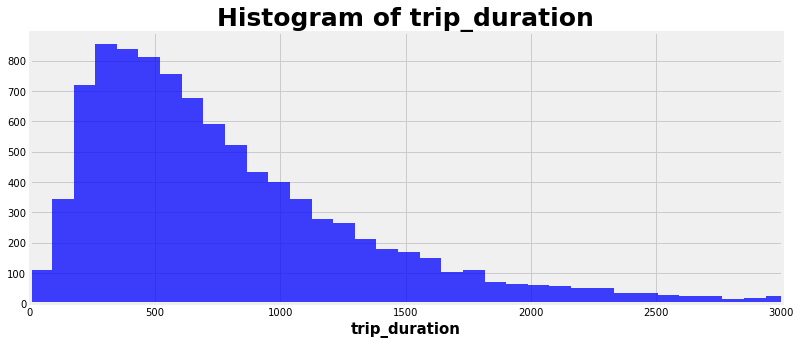

In [18]:
#visualising target variable
plt.figure(figsize = (12,5))
n,bins,patches = plt.hist(df.trip_duration, 1000, facecolor='blue', alpha=0.75)
plt.xlabel('trip_duration',fontsize=15,fontweight='bold')
plt.title('Histogram of trip_duration',fontsize=25,fontweight='bold')
plt.xlim(0, 3000)
plt.show();

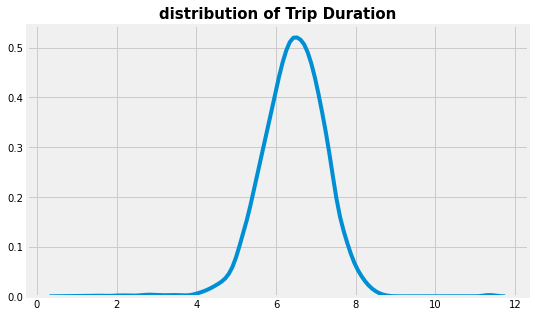

In [19]:
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(df['trip_duration'].values)).set_title(("distribution of Trip Duration"),fontsize=15,fontweight='bold');

In [20]:
#Analysing top 5 trip_duration
df['trip_duration'].value_counts(normalize=True).iloc[:5]

357    0.002617
614    0.001989
274    0.001884
287    0.001884
520    0.001884
Name: trip_duration, dtype: float64

# Univariate Visualization

Text(0, 0.5, 'count')

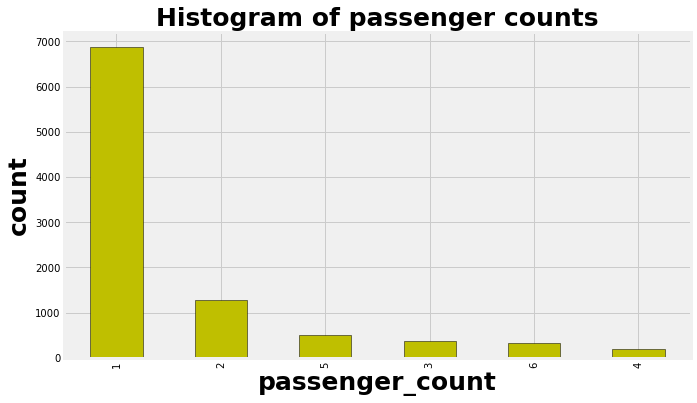

In [21]:
#Passenger Count
plt.figure(figsize=(10,6))
df['passenger_count'].value_counts().plot.bar(color= 'y', edgecolor ='k');
plt.title('Histogram of passenger counts',fontsize=25,fontweight='bold')
plt.xlabel('passenger_count',fontsize=25,fontweight='bold')
plt.ylabel('count',fontsize=25,fontweight='bold')

Text(0, 0.5, 'count')

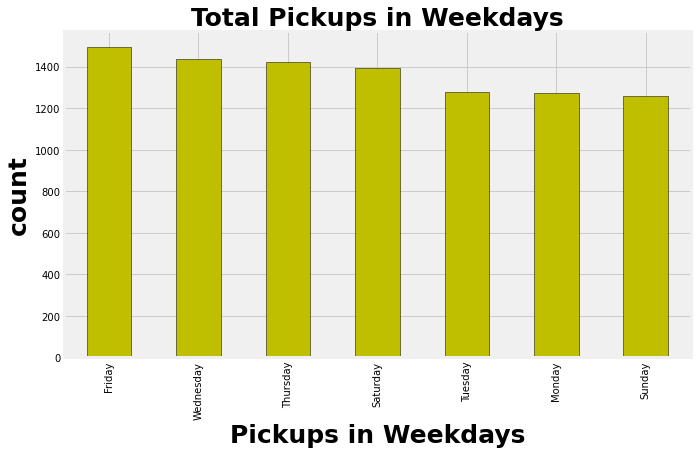

In [22]:
#total pickups in weekdays

plt.figure(figsize=(10,6))
df['pickup_day_name'].value_counts().plot.bar(color= 'y', edgecolor ='k');
plt.title('Total Pickups in Weekdays',fontsize=25,fontweight='bold')
plt.xlabel('Pickups in Weekdays',fontsize=25,fontweight='bold')
plt.ylabel('count',fontsize=25,fontweight='bold')

Text(0, 0.5, 'count')

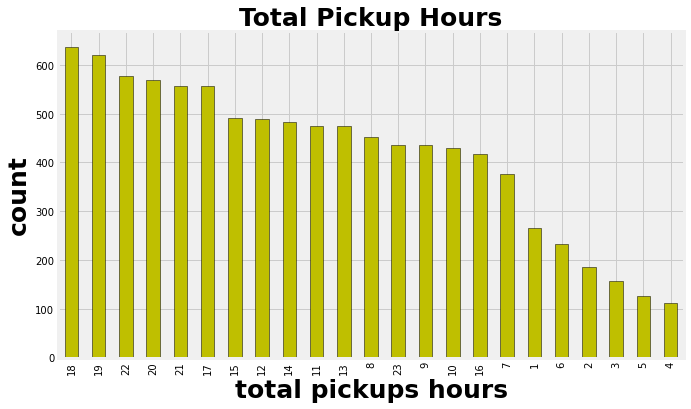

In [23]:
#total pickups hours

plt.figure(figsize=(10,6))
df['pickup_hour'].value_counts().plot.bar(color= 'y', edgecolor ='k');
plt.title('Total Pickup Hours',fontsize=25,fontweight='bold')
plt.xlabel('total pickups hours',fontsize=25,fontweight='bold')
plt.ylabel('count',fontsize=25,fontweight='bold')

# Correlation Heatmap

<AxesSubplot:>

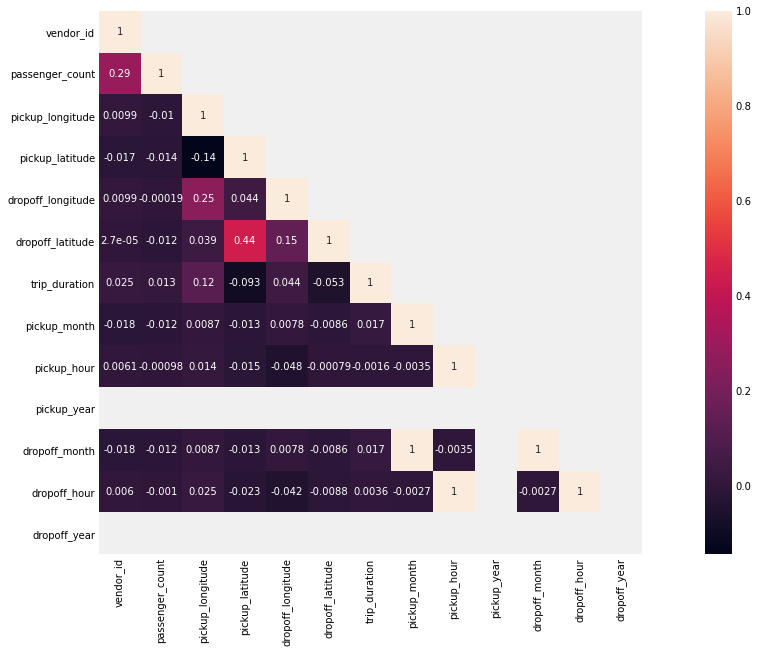

In [24]:
#Correlation of all the colums

cor = df.corr()
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(cor,mask= mask,square=True,annot=True)

# Sorting trip hours 

In [25]:
#ANALYSIS : From the above graphs we know the busiest weekday:Friday & busiest hours are: 6pm to 10pm

#Creating a new column according to the traffic scenerio of New York

def rush_hour(hour):
    if hour.item()>=7 and hour.item()<=9:
        return 'rush_hour_morning(7-9)'
    elif hour.item()>9 and hour.item()<16:
        return 'normal_hour_afternoon(9-16)'
    elif hour.item()>=16 and hour.item()<=19:
        return 'rush_hour_evening(18-22)'
    elif hour.item()>19 and hour.item()<=22:
        return 'normal_hour_evening(19-22)'
    else:
        return 'latenight(22 onwards)'
df['traffic_scenerio_pickup']=df[['pickup_hour']].apply(rush_hour, axis=1)
df['traffic_scenerio_dropoff']=df[['dropoff_hour']].apply(rush_hour, axis=1)

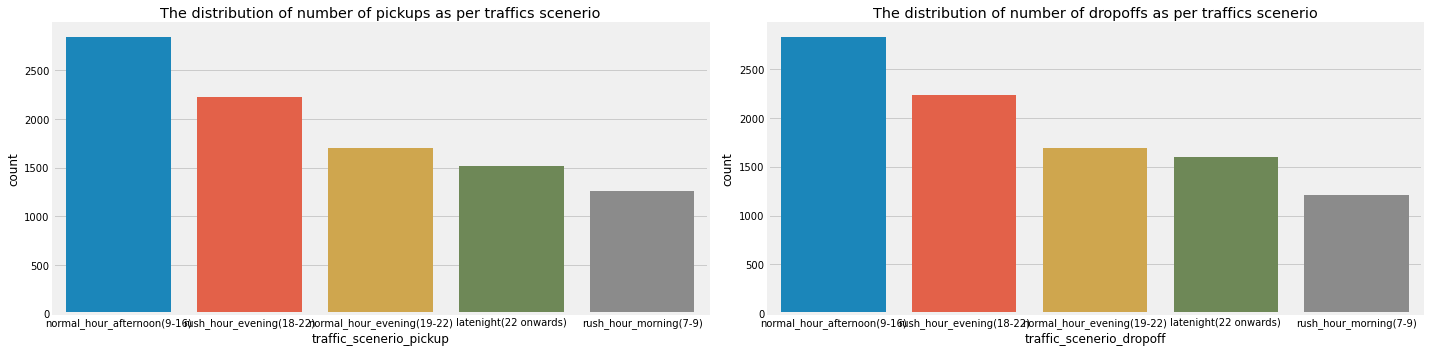

In [26]:
#Plotting pickup and dropoff trip distribution as per traffic scenerio
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
sns.countplot(x='traffic_scenerio_pickup',data=df,ax=ax[0])
ax[0].set_title('The distribution of number of pickups as per traffics scenerio')
sns.countplot(x='traffic_scenerio_dropoff',data=df,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs as per traffics scenerio')
plt.tight_layout()

Text(0.5, 1.0, 'The distribution of of the Pick Up  Duration distribution')

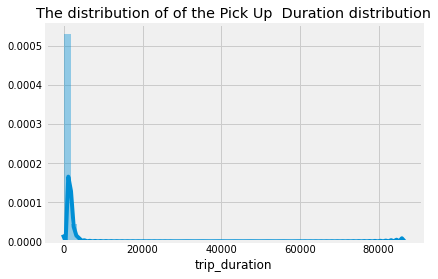

In [27]:
sns.distplot(df['trip_duration'],kde=True)
plt.title('The distribution of of the Pick Up  Duration distribution')

This histogram shows extreme right skewness, hence there are outliers. Lets see the boxplot of this variable

Text(0.5, 1.0, 'A boxplot depicting the pickup duration distribution')

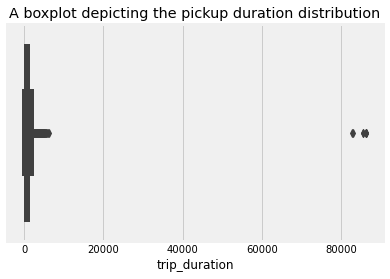

In [28]:
sns.boxplot(df['trip_duration'], orient='horizontal')
plt.title('A boxplot depicting the pickup duration distribution')

We can see there are few outliers, which we have to treat.

In [29]:
#Dropping trip_duration <1 min
df= df[df.trip_duration>60] # >1 min

#Dropping trip_duration >2 Hrs
df= df[df.trip_duration<=7200] # >2 hrs

Removed trip duration of less than 1 min and greater than 2 hrs as its not looking sensible that one can hire taxi for less than a min or more that 2 hrs in a city like New York!

<AxesSubplot:xlabel='vendor_id', ylabel='count'>

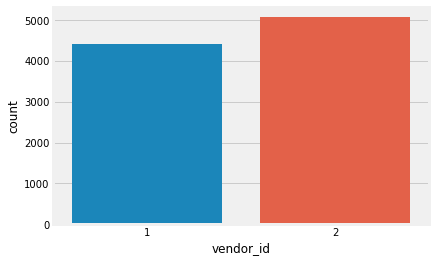

In [30]:
#Distribution of vendor_id

sns.countplot(x='vendor_id',data=df)

Distribution of vendor ID is ok

# Using haversine formula to calculate distance

In [31]:
#The borders of NY City, in coordinates comes out to be: city_long_border = (-74.03, -73.75) & city_lat_border = (40.63, 40.85)
#Comparing this to our 'df_taxi.describe()' output we see that there are some coordinate points (pick ups/drop offs) that fall outside these borders. So let's limit our area of investigation to within the NY City borders.

df = df[df['pickup_longitude'] <= -73.75]
df = df[df['pickup_longitude'] >= -74.03]
df = df[df['pickup_latitude'] <= 40.85]
df = df[df['pickup_latitude'] >= 40.63]
df = df[df['dropoff_longitude'] <= -73.75]
df = df[df['dropoff_longitude'] >= -74.03]
df = df[df['dropoff_latitude'] <= 40.85]
df = df[df['dropoff_latitude'] >= 40.63]

In [32]:
#Getting distance(in km) from geographocal co-ordinates
from math import radians, sin, cos, sqrt, asin
def haversine(columns):
    lat1, lon1, lat2, lon2 = columns
    R = 6372.8 # Earth radius in kilometers
    
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    
    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    c = 2*asin(sqrt(a))
    
    return R * c

cols = ['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']
distances = df[cols].apply(lambda x: haversine(x),axis = 1)
df['distance_km'] = distances.copy()
df['distance_km'] = round(df.distance_km,2)

<AxesSubplot:xlabel='distance_km', ylabel='trip_duration'>

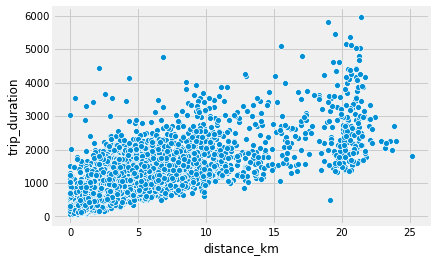

In [33]:
sns.scatterplot(x='distance_km',y='trip_duration',data=df)

In [34]:
#Removing distance Outliers
df = df[df['distance_km'] > 0]

In [35]:
#Getting Speed(Km/h) of the taxi 
#3600 to convert it from km/s to km/h

df['speed_km/h']= 3600*(df.distance_km/df.trip_duration)  

In [36]:
#Checking Distance and Speed range

print('Distance Bounds: {} to {}'.format(df.distance_km.min(),df.distance_km.max()))
print('Speed Bounds: {} to {}'.format(df['speed_km/h'].min(),df['speed_km/h'].max()))

Distance Bounds: 0.01 to 25.14
Speed Bounds: 0.03130434782608696 to 142.87733887733887


now time can be calculated as: time = distance/speed

In [37]:
#Removing speed Outliers
df = df[df['speed_km/h'] > 0]
df = df[df['speed_km/h'] < 100]

In [38]:
#checking passenger counts
df['passenger_count'].value_counts()

1    6699
2    1259
5     501
3     363
6     316
4     189
Name: passenger_count, dtype: int64

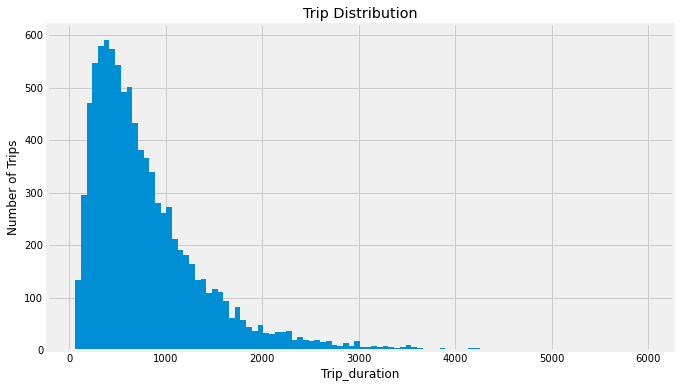

In [39]:
#Plotting Trip Distribution
plt.figure(figsize=(10,6))
plt.hist(df.trip_duration, bins=100)
plt.xlabel('Trip_duration')
plt.ylabel('Number of Trips')
plt.title('Trip Distribution')
plt.show()

Right skewed

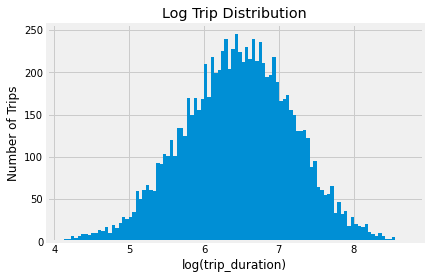

<AxesSubplot:xlabel='log_trip_duration'>

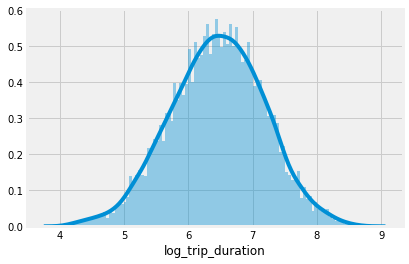

In [40]:
#Applying Feature Scaling in trip_duration caloumn to normalize the data
df['log_trip_duration']= np.log1p(df['trip_duration'])
plt.hist(df['log_trip_duration'].values, bins=100)
plt.title('Log Trip Distribution')
plt.xlabel('log(trip_duration)')
plt.ylabel('Number of Trips')
plt.show()
sns.distplot(df["log_trip_duration"], bins =100)

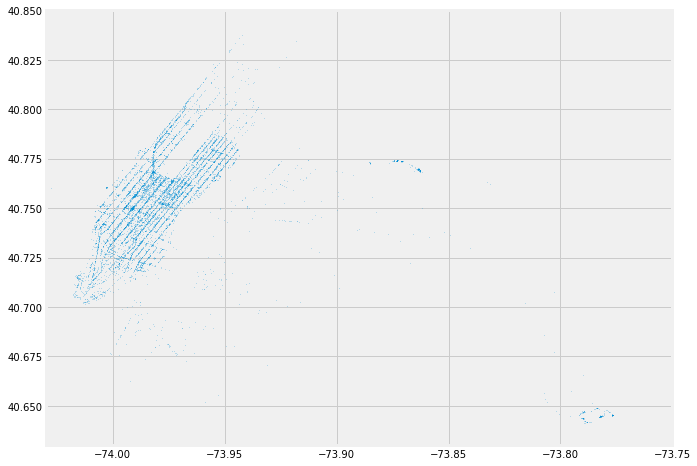

In [41]:
#Visualizing Passenger road map for picking up
fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(10,8))
plt.ylim(40.63, 40.85)
plt.xlim(-74.03,-73.75)
ax.scatter(df['pickup_longitude'],df['pickup_latitude'], s=0.02, alpha=1)

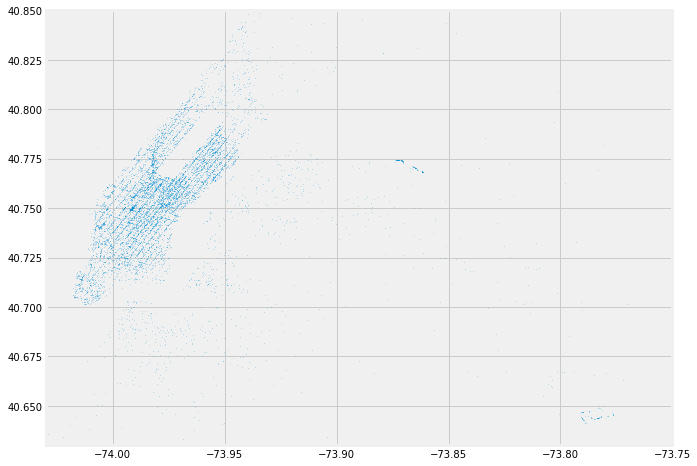

In [42]:
#Visualizing Passenger road map for dropoff
fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(10,8))
plt.ylim(40.63, 40.85)
plt.xlim(-74.03,-73.75)
ax.scatter(df['dropoff_longitude'],df['dropoff_latitude'], s=0.02, alpha=1)


# Cleaning data:  one hot encoding, adding columns, removing duplicate columns, dropping columns,

In [43]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_month', 'pickup_day_name', 'pickup_hour',
       'pickup_year', 'dropoff_month', 'dropoff_day_name', 'dropoff_hour',
       'dropoff_year', 'traffic_scenerio_pickup', 'traffic_scenerio_dropoff',
       'distance_km', 'speed_km/h', 'log_trip_duration'],
      dtype='object')

In [44]:
#check datatypes
df.dtypes

id                                  object
vendor_id                            int64
pickup_datetime             datetime64[ns]
dropoff_datetime            datetime64[ns]
passenger_count                      int64
pickup_longitude                   float64
pickup_latitude                    float64
dropoff_longitude                  float64
dropoff_latitude                   float64
store_and_fwd_flag                  object
trip_duration                        int64
pickup_month                         int64
pickup_day_name                     object
pickup_hour                          int64
pickup_year                          int64
dropoff_month                        int64
dropoff_day_name                    object
dropoff_hour                         int64
dropoff_year                         int64
traffic_scenerio_pickup             object
traffic_scenerio_dropoff            object
distance_km                        float64
speed_km/h                         float64
log_trip_du

In [45]:
#Applying one hot encoding to the catagorical variables(nominal)

taxi_traffic_scenerio_pickup=pd.get_dummies(df.traffic_scenerio_pickup )
taxi_traffic_scenerio_dropoff=pd.get_dummies(df.traffic_scenerio_dropoff )
taxi_pickup_day_name=pd.get_dummies(df.pickup_day_name )
taxi_dropoff_day_name=pd.get_dummies(df.dropoff_day_name )
taxi_vendor=pd.get_dummies(df.vendor_id)
taxi_pax=pd.get_dummies(df.passenger_count)
taxi_store_and_fwd_flag=pd.get_dummies(df.store_and_fwd_flag)
taxi_pickup_month=pd.get_dummies(df.pickup_month)
taxi_dropoff_month=pd.get_dummies(df.dropoff_month)

In [46]:
#Adding encoded columns to orginal data
df=pd.concat([df,taxi_pickup_day_name,taxi_dropoff_day_name,taxi_traffic_scenerio_pickup,taxi_traffic_scenerio_dropoff,taxi_vendor,taxi_pax,taxi_store_and_fwd_flag,taxi_pickup_month,taxi_dropoff_month],axis='columns')

In [47]:
df.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,3,4,5,6,1,2,3,4,5,6
455488,id2898909,1,2016-03-03 10:30:21,2016-03-03 10:43:49,1,-73.991409,40.750320,-73.978813,40.762032,N,...,1,0,0,0,0,0,1,0,0,0
112922,id3276089,2,2016-03-23 18:39:57,2016-03-23 19:01:06,1,-73.981850,40.773289,-73.978973,40.757240,N,...,1,0,0,0,0,0,1,0,0,0


In [48]:
df.columns

Index([                         'id',                   'vendor_id',
                   'pickup_datetime',            'dropoff_datetime',
                   'passenger_count',            'pickup_longitude',
                   'pickup_latitude',           'dropoff_longitude',
                  'dropoff_latitude',          'store_and_fwd_flag',
                     'trip_duration',                'pickup_month',
                   'pickup_day_name',                 'pickup_hour',
                       'pickup_year',               'dropoff_month',
                  'dropoff_day_name',                'dropoff_hour',
                      'dropoff_year',     'traffic_scenerio_pickup',
          'traffic_scenerio_dropoff',                 'distance_km',
                        'speed_km/h',           'log_trip_duration',
                            'Friday',                      'Monday',
                          'Saturday',                      'Sunday',
                          'Thursda

In [49]:
#REMOVING DUPLICATE columns 
df = df.loc[:,~df.columns.duplicated()]

In [50]:
#checking the columns
df.columns

Index([                         'id',                   'vendor_id',
                   'pickup_datetime',            'dropoff_datetime',
                   'passenger_count',            'pickup_longitude',
                   'pickup_latitude',           'dropoff_longitude',
                  'dropoff_latitude',          'store_and_fwd_flag',
                     'trip_duration',                'pickup_month',
                   'pickup_day_name',                 'pickup_hour',
                       'pickup_year',               'dropoff_month',
                  'dropoff_day_name',                'dropoff_hour',
                      'dropoff_year',     'traffic_scenerio_pickup',
          'traffic_scenerio_dropoff',                 'distance_km',
                        'speed_km/h',           'log_trip_duration',
                            'Friday',                      'Monday',
                          'Saturday',                      'Sunday',
                          'Thursda

In [51]:
#droping unnecessary columns
df=df.drop(['id','vendor_id','passenger_count','pickup_datetime','dropoff_datetime',
            'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude',
            'log_trip_duration','speed_km/h','store_and_fwd_flag','traffic_scenerio_pickup','traffic_scenerio_dropoff',
            'pickup_month','dropoff_month','pickup_day_name','dropoff_day_name','pickup_hour','dropoff_hour',
           ],axis='columns')

In [52]:
df.columns

Index([              'trip_duration',                 'pickup_year',
                      'dropoff_year',                 'distance_km',
                            'Friday',                      'Monday',
                          'Saturday',                      'Sunday',
                          'Thursday',                     'Tuesday',
                         'Wednesday',       'latenight(22 onwards)',
       'normal_hour_afternoon(9-16)',  'normal_hour_evening(19-22)',
          'rush_hour_evening(18-22)',      'rush_hour_morning(7-9)',
                                   1,                             2,
                                   3,                             4,
                                   5,                             6,
                                 'N',                           'Y'],
      dtype='object')

In [53]:
#droping year columns
df=df.drop(['pickup_year','dropoff_year'],axis='columns')

# Benchmark: Classification, train_test_split

In [54]:
#Importing some analytical libraries

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [55]:
#Assigning X and y variables
X = df.drop('trip_duration',axis='columns')
y = df['trip_duration']
X.shape, y.shape

((9327, 21), (9327,))

In [56]:
#Splitting the dataset into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [57]:
#checking length(80% of dataset) of train_dataset
len(X_train)

7461

In [58]:
#checking the randomly picked train dataset
X_train.head(2)

,distance_km,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,latenight(22 onwards),normal_hour_afternoon(9-16),...,rush_hour_evening(18-22),rush_hour_morning(7-9),1,2,3,4,5,6,N,Y
117438,0.92,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
138896,1.51,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [59]:
#checking length(20% of dataset) of test_dataset
len(X_test)

1866

# Implementing KNN Regressor

In [60]:
#importing KNN regressor and metric mse

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse
from sklearn import metrics
knn = KNN()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [61]:
from sklearn.model_selection import cross_val_score
knn_scores = cross_val_score(knn, X_train, y_train, scoring='r2', cv=5)
knn_scores  

array([0.67786091, 0.64241872, 0.66565622, 0.63880136, 0.64665796])

In [62]:
# Consistency using Mean and standard deviation in percentage
knn_scores.mean()*100, knn_scores.std()*100

(65.427903553524, 1.4992342009267645)

In [63]:
def Elbow(K):
  #initiating empty list
    test_mse = []
  
  #training model for evey value of K
    for i in K:
        #Instance of KNN
        reg = KNN(n_neighbors = i)
        reg.fit(X_train, y_train)
        #Appending mse value to empty list claculated using the predictions
        tmp = reg.predict(X_test)
        tmp = mse(tmp,y_test)
        test_mse.append(tmp)
    
    return test_mse

In [64]:
#Defining K range
k = range(1,40)

In [65]:
# calling above defined function
test = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

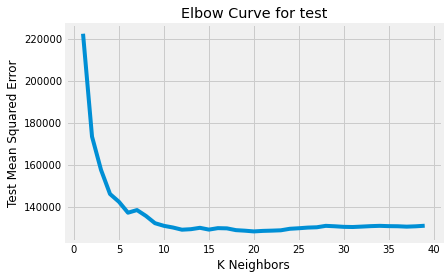

In [66]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow Curve for test')

### from the graph its clear k=10

In [67]:
# Creating instance of KNN
reg = KNN(n_neighbors = 10)

# Fitting the model
reg.fit(X_train, y_train)

# Predicting over the Train Set and calculating MSE
train_predict = reg.predict(X_train)
test_predict = reg.predict(X_test)

In [68]:
knn = KNN()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [69]:
#RMSE score 

knn_rmse = np.sqrt(metrics.mean_squared_error(knn_pred,y_test))
knn_rmse

377.3462359130811

In [70]:
#R2 score
knn_r2score = metrics.r2_score(knn_pred,y_test)
knn_r2score

0.5006629328103309

In [72]:
#Train Score
knn_train=knn.score(X_train,y_train)
knn_train

0.7698987622005953

In [73]:
#Test Score
knn_test=knn.score(X_test,y_test)
knn_test

0.6219820239853545

# Linear Regression

In [74]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

In [75]:
#RMSE score 

lr_rmse = np.sqrt(metrics.mean_squared_error(lr_pred,y_test))
lr_rmse

381.3228373455141

In [76]:
#R2 score
lr_r2score = metrics.r2_score(lr_pred,y_test)
lr_r2score

0.37221294979742214

In [77]:
#Train Score
lr_train=lr.score(X_train,y_train)
lr_train

0.6419013867858143

In [78]:
#Test Score
lr_test=lr.score(X_test,y_test)
lr_test

0.6139726817114017

In [79]:
#Null RMSE
y_null=np.zeros_like(y_test,dtype=float)
y_null.fill(y_test.mean())
np.sqrt(metrics.mean_squared_error(y_test,y_null))

613.7391054002607

<AxesSubplot:title={'center':'Model Coefficients'}>

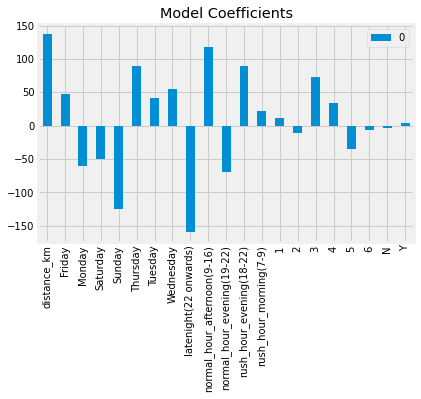

In [80]:
coef1 = pd.DataFrame(lr.coef_,index=X_train.columns)
coef1.plot(kind='bar', title='Model Coefficients')

# Building Decision Tree Regressor Model

In [81]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)

In [82]:
#RMSE score 
dt_rmse = np.sqrt(metrics.mean_squared_error(dt_pred,y_test))
dt_rmse

476.22024106705607

In [83]:
#R2 score
dt_r2score = metrics.r2_score(dt_pred,y_test)
dt_r2score

0.4399977272092457

In [84]:
#Train Score
dt_train=dt.score(X_train,y_train)
dt_train

0.9852042054437756

In [85]:
#Test Score
dt_test=dt.score(X_test,y_test)
dt_test

0.3979284452774253

# BUILDING Random Forest Regressor Model

In [86]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)

In [87]:
#RMSE score 
rf_rmse = np.sqrt(metrics.mean_squared_error(rf_pred,y_test))
rf_rmse

377.4958082382799

In [88]:
#R2 score
rf_r2score = metrics.r2_score(rf_pred,y_test)
rf_r2score

0.5259691616134505

In [89]:
#Train Score
rf_train=rf.score(X_train,y_train)
rf_train

0.9396613909928095

In [90]:
#Test Score
rf_test=rf.score(X_test,y_test)
rf_test

0.6216822874139497

# Building AdaBoost Regressor Model

In [91]:
from sklearn.ensemble import AdaBoostRegressor
ab=AdaBoostRegressor()
ab.fit(X_train,y_train)
ab_pred=ab.predict(X_test)

In [92]:
#RMSE score 
ab_rmse = np.sqrt(metrics.mean_squared_error(ab_pred,y_test))
ab_rmse

544.5036287440971

In [93]:
#R2 score
ab_r2score = metrics.r2_score(ab_pred,y_test)
ab_r2score

-0.050117569491979985

In [94]:
#Train Score
ab_train=ab.score(X_train,y_train)
ab_train

0.3076928676205769

In [95]:
#Test Score
ab_test=ab.score(X_test,y_test)
ab_test

0.21289265545381686

# Building Gradient Boosting Regressor


In [96]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)
gb_pred = gb.predict(X_test)

In [97]:
#RMSE score 
gb_rmse = np.sqrt(metrics.mean_squared_error(gb_pred,y_test))
gb_rmse

347.8880003527422

In [98]:
#R2 score
gb_r2score = metrics.r2_score(gb_pred,y_test)
gb_r2score

0.5589631097945574

In [99]:
#Train Score
gb_train=gb.score(X_train,y_train)
gb_train

0.7359304716385332

In [100]:
#Test Score
gb_test=gb.score(X_test,y_test)
gb_test

0.6786995705752099

# Building XGB Regressor Model

In [101]:
import sys
!{sys.executable} -m pip install xgboost

In [102]:
import xgboost

In [103]:
from xgboost.sklearn import XGBRegressor
xgb= XGBRegressor()
xgb.fit(X_train,y_train)
xgb_pred=xgb.predict(X_test)

In [104]:
#RMSE score 
xgb_rmse = np.sqrt(metrics.mean_squared_error(xgb_pred,y_test))
xgb_rmse

370.30584209993924

In [105]:
#R2 score
xgb_r2score = metrics.r2_score(xgb_pred,y_test)
xgb_r2score

0.5392772910332837

In [106]:
#Train Score
xgb_train=xgb.score(X_train,y_train)
xgb_train

0.8660431317157835

In [107]:
#Test Score
xgb_test=xgb.score(X_test,y_test)
xgb_test

0.6359562867561943

# Building LGBM Regressor Model

In [108]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [109]:
import lightgbm as lgb
lgbm = lgb.LGBMRegressor()
lgbm.fit(X_train,y_train)
lgbm_pred = lgbm.predict(X_test)

In [110]:
#RMSE score 
lgbm_rmse = np.sqrt(metrics.mean_squared_error(lgbm_pred,y_test))
lgbm_rmse

355.1662139783704

In [111]:
#R2 score
lgbm_r2score = metrics.r2_score(lgbm_pred,y_test)
lgbm_r2score

0.5450237429363084

In [112]:
#Train Score
lgbm_train=lgbm.score(X_train,y_train)
lgbm_train

0.7650706568846082

In [113]:
#Test Score
lgbm_test=lgbm.score(X_test,y_test)
lgbm_test

0.665114996616837

# Model Performance Assessment

In [114]:
#Creating dictionary for all the metrics and models
metrics = {'Metrics': ['RMSE Score','R2 Score','Train Score','Test Score'],'KNN':[knn_rmse,knn_r2score,knn_train,knn_test],'Linear Regression':[lr_rmse,lr_r2score,lr_train,lr_test],
          'Decision Tree Regressor':[dt_rmse,dt_r2score,dt_train,dt_test],'Random Forest Regressor':[rf_rmse,rf_r2score,rf_train,rf_test],
        'AdaBoost Regressor':[ab_rmse,ab_r2score,ab_train,ab_test],
          'GradientBoosting Regressor':[gb_rmse,gb_r2score,gb_train,gb_test],'XGBoost Regressor':[xgb_rmse,xgb_r2score,xgb_train,xgb_test],
           'LGBM Regressor':[lgbm_rmse,lgbm_r2score,lgbm_train,lgbm_test]}

In [115]:
#Converting dictionary to dataframe
metrics = pd.DataFrame(metrics)
metrics

,Metrics,KNN,Linear Regression,Decision Tree Regressor,Random Forest Regressor,AdaBoost Regressor,GradientBoosting Regressor,XGBoost Regressor,LGBM Regressor
0,RMSE Score,377.346236,381.322837,476.220241,377.495808,544.503629,347.888000,370.305842,355.166214
1,R2 Score,0.500663,0.372213,0.439998,0.525969,-0.050118,0.558963,0.539277,0.545024
2,Train Score,0.769899,0.641901,0.985204,0.939661,0.307693,0.735930,0.866043,0.765071
3,Test Score,0.621982,0.613973,0.397928,0.621682,0.212893,0.678700,0.635956,0.665115


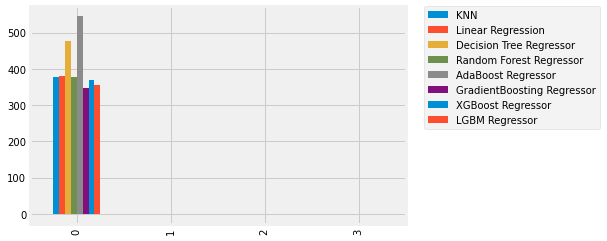

In [140]:
metrics.plot(y=['KNN',"Linear Regression", "Decision Tree Regressor","Random Forest Regressor","AdaBoost Regressor",
               "GradientBoosting Regressor","XGBoost Regressor","LGBM Regressor"], kind="bar", legend=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

* Looking at the above Performance Matrix we can say thay XGBoost is the best model for this dataset.

# Model Explanability

In [121]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.


In [122]:
pip install PermutationImportance

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Alfarid\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Alfarid\\AppData\\Local\\Temp\\pip-install-m4a620y5\\scipy_66b3a38ce1d847659b7bf26f95b5bedc\\setup.py'"'"'; __file__='"'"'C:\\Users\\Alfarid\\AppData\\Local\\Temp\\pip-install-m4a620y5\\scipy_66b3a38ce1d847659b7bf26f95b5bedc\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Alfarid\AppData\Local\Temp\pip-wheel-m1vs9_nf'
       cwd: C:\Users\Alfarid\AppData\Local\Temp\pip-install-m4a620y5\scipy_66b3a38ce1d847659b7bf26f95b5bedc\
  Complete output (140 lines):
  C:\Users\Alfarid\AppData\Local\Temp\pip-install-m4a620y5\scipy_66b3a38ce1d847659b7bf26f95b5bedc\setup.py:11


  Using cached PermutationImportance-1.2.1.8-py2.py3-none-any.whl (50 kB)
  Using cached scipy-1.1.0.tar.gz (15.6 MB)
  Running setup.py clean for scipy
Failed to build scipy
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
    Running setup.py install for scipy: started
    Running setup.py install for scipy: finished with status 'error'
  Rolling back uninstall of scipy
  Moving to c:\users\alfarid\anaconda3\lib\site-packages\scipy-1.7.3.dist-info\
   from C:\Users\Alfarid\anaconda3\Lib\site-packages\~cipy-1.7.3.dist-info
  Moving to c:\users\alfarid\anaconda3\lib\site-packages\scipy\
   from C:\Users\Alfarid\anaconda3\Lib\site-packages\~cipy


  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries mkl_rt not found in ['C:/Users/Alfarid/anaconda3\\Library\\lib']
    NOT AVAILABLE
  
  openblas_lapack_info:
    libraries openblas not found in ['C:\\Users\\Alfarid\\anaconda3\\lib', 'C:\\', 'C:\\Users\\Alfarid\\anaconda3\\libs']
  get_default_fcompiler: matching types: '['gnu', 'intelv', 'absoft', 'compaqv', 'intelev', 'gnu95', 'g95', 'intelvem', 'intelem', 'flang']'
  customize GnuFCompiler
  Could not locate executable g77
  Could not locate executable f77
  customize IntelVisualFCompiler
  Could not locate executable ifort
  Could not locate executable ifl
  customize AbsoftFCompiler
  Could not locate executable f90
  customize CompaqVisualFCompiler
  Could not locate executable DF
  customize IntelItaniumVisualFCompiler
  Could not locate executable efl
  customize Gnu95FCompiler
  Could not locate executable gfortran
  Could not locate executable f

In [123]:
pip install lime

    Could not locate executable ifort
    Could not locate executable ifl
    customize AbsoftFCompiler
    Could not locate executable f90
    customize CompaqVisualFCompiler
    Could not locate executable DF
    customize IntelItaniumVisualFCompiler
    Could not locate executable efl
    customize Gnu95FCompiler
    Could not locate executable gfortran
    Could not locate executable f95
    customize G95FCompiler
    Could not locate executable g95
    customize IntelEM64VisualFCompiler
    customize IntelEM64TFCompiler
    Could not locate executable efort
    Could not locate executable efc
    customize PGroupFlangCompiler
    Could not locate executable flang
    don't know how to compile Fortran code on platform 'nt'
      NOT AVAILABLE
    
    openblas_clapack_info:
      libraries openblas,lapack not found in ['C:\\Users\\Alfarid\\anaconda3\\lib', 'C:\\', 'C:\\Users\\Alfarid\\anaconda3\\libs']
      NOT AVAILABLE
    
    flame_info:
      libraries flame not found in ['C:

Note: you may need to restart the kernel to use updated packages.


In [124]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [125]:
#Finding the importance of columns for prediction
#Eli5
import eli5
from eli5.sklearn import PermutationImportance
import lime
import lime.lime_tabular
import shap

In [126]:
perm = PermutationImportance(xgb, random_state=1).fit(X_test,xgb_pred)


In [127]:
perm = PermutationImportance(xgb, random_state=1).fit(X_test,xgb_pred)

In [128]:
eli5.show_weights(perm)

Weight,Feature
1.9714 ± 0.1052,x0
0.0718 ± 0.0016,x8
0.0302 ± 0.0028,x4
0.0290 ± 0.0033,x9
0.0272 ± 0.0016,x10
0.0233 ± 0.0017,x3
0.0190 ± 0.0021,x11
0.0149 ± 0.0042,x5
0.0117 ± 0.0037,x2
0.0100 ± 0.0007,x13


In [129]:

feature_names= X_train.columns.tolist()
feature_names

['distance_km',
 'Friday',
 'Monday',
 'Saturday',
 'Sunday',
 'Thursday',
 'Tuesday',
 'Wednesday',
 'latenight(22 onwards)',
 'normal_hour_afternoon(9-16)',
 'normal_hour_evening(19-22)',
 'rush_hour_evening(18-22)',
 'rush_hour_morning(7-9)',
 1,
 2,
 3,
 4,
 5,
 6,
 'N',
 'Y']

In [130]:
eli5.show_weights(xgb)

Weight,Feature
0.2397,distance_km
0.1401,latenight(22 onwards)
0.1039,normal_hour_evening(19-22)
0.0563,Sunday
0.0514,normal_hour_afternoon(9-16)
0.0441,Saturday
0.0393,Wednesday
0.0386,rush_hour_evening(18-22)
0.0336,Thursday
0.0307,Friday


* above chart depicts which factors affect the trip duration starting with the most to least
* distance_km affects the most
* while passenger count with 6 effects the least
* store and fwd flag, not having a connection with server has no effect

# Closing Remarks


* Most of the trips involve only 1 passenger. There are trips with 7-9 passengers but they are very low in number.
* Vendor 2 has more number of trips as compared to vendor 1
* Number of pickups for weekends is much lower than week days with a peak on Thursday
* Note that here weekday is a decimal number, where 0 is Sunday and 6 is Saturday.
* In afternoon 9-16 has max no of pick_ups and drop_offs
* Trip durations are definitely shorter for late night and early morning hours that can be attributed to low traffic density
* From the correlation heatmap we see that the lattitude and longitude features have higher correlation with the target as compared to the other features.

* In this project we covered various aspects of the Machine learning development cycle. 
* We observed that the data exploration and variable analysis is a very important aspect of the whole cycle and should be done for thorough understanding of the data. We also cleaned the data while exploring as there were some outliers which should be treated before feature engineering. Further we did feature engineering to filter and gather only the optimal features which are more significant and covered most of the variance in the dataset. Then finally we trained the models on the optimum featureset to get the results.